# Part I - Ford GoBike System Data
## by Michal Unger Madar

## Introduction
> The data presented by the Ford Bicycle Rental Company over February 2019. 
The data was studied in stages and data cleaning was conducted to obtain more reliable results.



## Preliminary Wrangling


In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


%matplotlib inline

In [23]:
bike=pd.read_csv("201902-fordgobike-tripdata.csv")
bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [24]:
print (bike.shape)
print (bike.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [25]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [26]:
bike.duplicated().sum()

0

In [27]:
# NaN values?
bike.isnull().sum() 


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

# Cleaning data actions

In [28]:

bike.dropna(inplace=True)
bike.isnull().sum() 

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [29]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [30]:
bike.user_type = bike.user_type.astype('category')
bike.member_gender = bike.member_gender.astype('category')
bike.bike_share_for_all_trip = bike.bike_share_for_all_trip.astype('category')

In [31]:
bike['start_station_id'] = bike['start_station_id'].astype(str)
bike['end_station_id'] = bike['end_station_id'].astype(str)
bike['bike_id'] = bike['bike_id'].astype(str)
bike.member_birth_year = bike.member_birth_year.astype(int)


In [32]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [33]:
bike['age_of_member'] = 2023 - bike['member_birth_year']
bike['age_of_member'] = bike['age_of_member'].astype(int)

In [34]:
bike.age_of_member.mean()

38.196865425945404

In [35]:
bike.age_of_member.describe()

count    174952.000000
mean         38.196865
std          10.118731
min          22.000000
25%          31.000000
50%          36.000000
75%          43.000000
max         145.000000
Name: age_of_member, dtype: float64

Accepting the result of age 145 is apparently a mistake, and from a statistical test the average is 38, so we will remove the extremes over age 70.

In [36]:
bike=bike.query('age_of_member <=70')

In [38]:
bike['duration_mints'] = bike['duration_sec']/60
bike['duration_mints'] = bike['duration_mints'].astype(int)

In [40]:
bike['end_time_hour'] = bike['end_time'].dt.hour
bike['start_time_hour'] = bike['start_time'].dt.hour


In [42]:
bike['month_start_time'] = bike['start_time'].dt.strftime('%B')

bike['number_start_time'] = bike['start_time'].dt.month.astype(int)

In [44]:
bike['weekday_start_time'] = bike['start_time'].dt.strftime('%A')


In [45]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,age_of_member,duration_mints,end_time_hour,start_time_hour,month_start_time,number_start_time,weekday_start_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,39,869,8,17,February,2,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,51,1030,5,12,February,2,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,34,608,4,17,February,2,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,49,26,0,23,February,2,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,64,29,0,23,February,2,Thursday


In [47]:
#droping unimportant columns

bike.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace=True)

In [48]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173731 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173731 non-null  int64         
 1   start_time               173731 non-null  datetime64[ns]
 2   end_time                 173731 non-null  datetime64[ns]
 3   start_station_id         173731 non-null  object        
 4   start_station_name       173731 non-null  object        
 5   end_station_id           173731 non-null  object        
 6   end_station_name         173731 non-null  object        
 7   bike_id                  173731 non-null  object        
 8   user_type                173731 non-null  category      
 9   member_birth_year        173731 non-null  int32         
 10  member_gender            173731 non-null  category      
 11  bike_share_for_all_trip  173731 non-null  category      
 12  age_of_member   

In [49]:
bike.shape

(173731, 19)

### What is the structure of your dataset?

Company Named "Ford GoBike System Data" in San Fransisco gathered a lot of data of bike-sharing members' behavior between 2018-2019.
There are 183,412 rows and 16 columns. In the Dtype (info()function) I have done some cleaning and order the data. After dropping a nulls we have 174,952 rows and 21 columns.


### What is/are the main feature(s) of interest in your dataset?
I am mainly interested in researching the bike-share behavior on those years in different aspects: most popular station, most trip durations, relationships between data such as the relationship between the length of the trip and age, or the length of the trip and gender and more. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 I would use the features such as star and end time, ages members, gender, start&end station and type of members.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


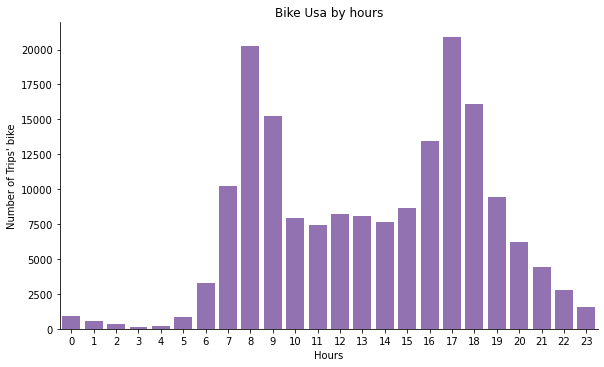

In [124]:
# which Hour is the most popular?

color = sns.color_palette()[4]

sns.catplot(data = bike, x='start_time_hour', kind='count', color = color, aspect = 1.7)

plt.xlabel("Hours")
plt.ylabel("Number of Trips' bike")
plt.title('Bike Usa by hours', y=1);


Popular times are morning and afternoon. Apparently the bike is used for commuting to work.

In [28]:
#what is the distribution of the gender?


bike[["member_gender"]].value_counts()

member_gender
Male             129495
Female            40639
Other              3597
dtype: int64

<Figure size 1440x360 with 0 Axes>

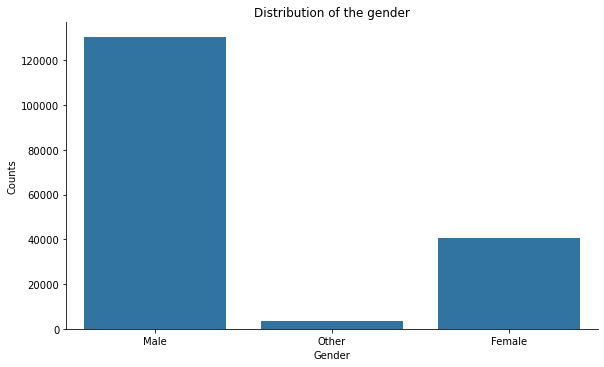

In [158]:
#what is the distribution of the gender?

plt.figure(figsize = [20, 5])
color = sns.color_palette()[0]
sns.catplot(data = bike, x = 'member_gender', kind='count', color = color, aspect = 1.7)
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title('Distribution of the gender', y=1);

There seem to be more men than women using bicycles. This is important to know for two reasons: 1. Perhaps the advertisement is directed mainly to men? 2. If it is a goal to encourage women to use bicycles - it is probably not done optimally because women rarely use it. From a business point of view, you should think about how to encourage women to use bicycles.

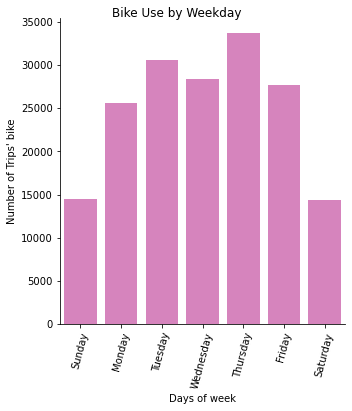

In [380]:
# which day is the most popular?

weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#plt.figure(figsize=[10, 5])
color = sns.color_palette()[6]


plot=sns.catplot(data=bike, x='weekday_start_time', kind='count', color = color, order = weekday)

plot.set_axis_labels('Days of week', "Number of Trips' bike")

plot.fig.suptitle('Bike Use by Weekday', y=1, fontsize=12);

plot.set_xticklabels(rotation=75);

It is evident that the preferred day for using the bicycle is Tuesday and Thursday.

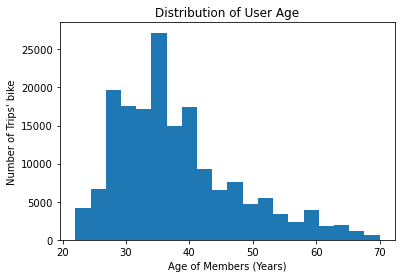

In [50]:
# what is the mean age?

def plot_age(data, x, x_lable, y_lable, title):
    """Plotting Distribution of User Age"""
    plt.hist(data = data, x = x, bins = 20);
    plt.title(title, y=1, fontsize=12)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable);



plot_age(data= bike, x = 'age_of_member', x_lable= 'Age of Members (Years)',
        y_lable= "Number of Trips' bike", title='Distribution of User Age')    

#plt.hist(data = bike, x = 'age_of_member', bins = 20);
#plt.title("Distribution of User Age", y=1, fontsize=12)
#plt.xlabel('Age of Members (Years)')
#plt.ylabel("Number of Trips' bike");

In [224]:
#The differences between susscrubes and coustumer

bike["user_type"].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

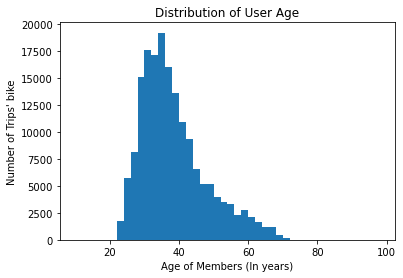

In [394]:
# It is can be seen that the age is no more than 100
#so let's coustumize the plot

bin_edges = np.arange(10, 100, 2)
plt.hist(data = bike, x = 'age_of_member', bins = bin_edges);

plt.title("Distribution of User Age", y=1, fontsize=12)
plt.xlabel('Age of Members (In years)')
plt.ylabel("Number of Trips' bike");


The average age when using bicycles is significant for understanding who the main users are.

In [197]:
#how much unique stations there are?
bike[['start_station_name']].value_counts()


start_station_name                                       
Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Length: 329, dtype: int64

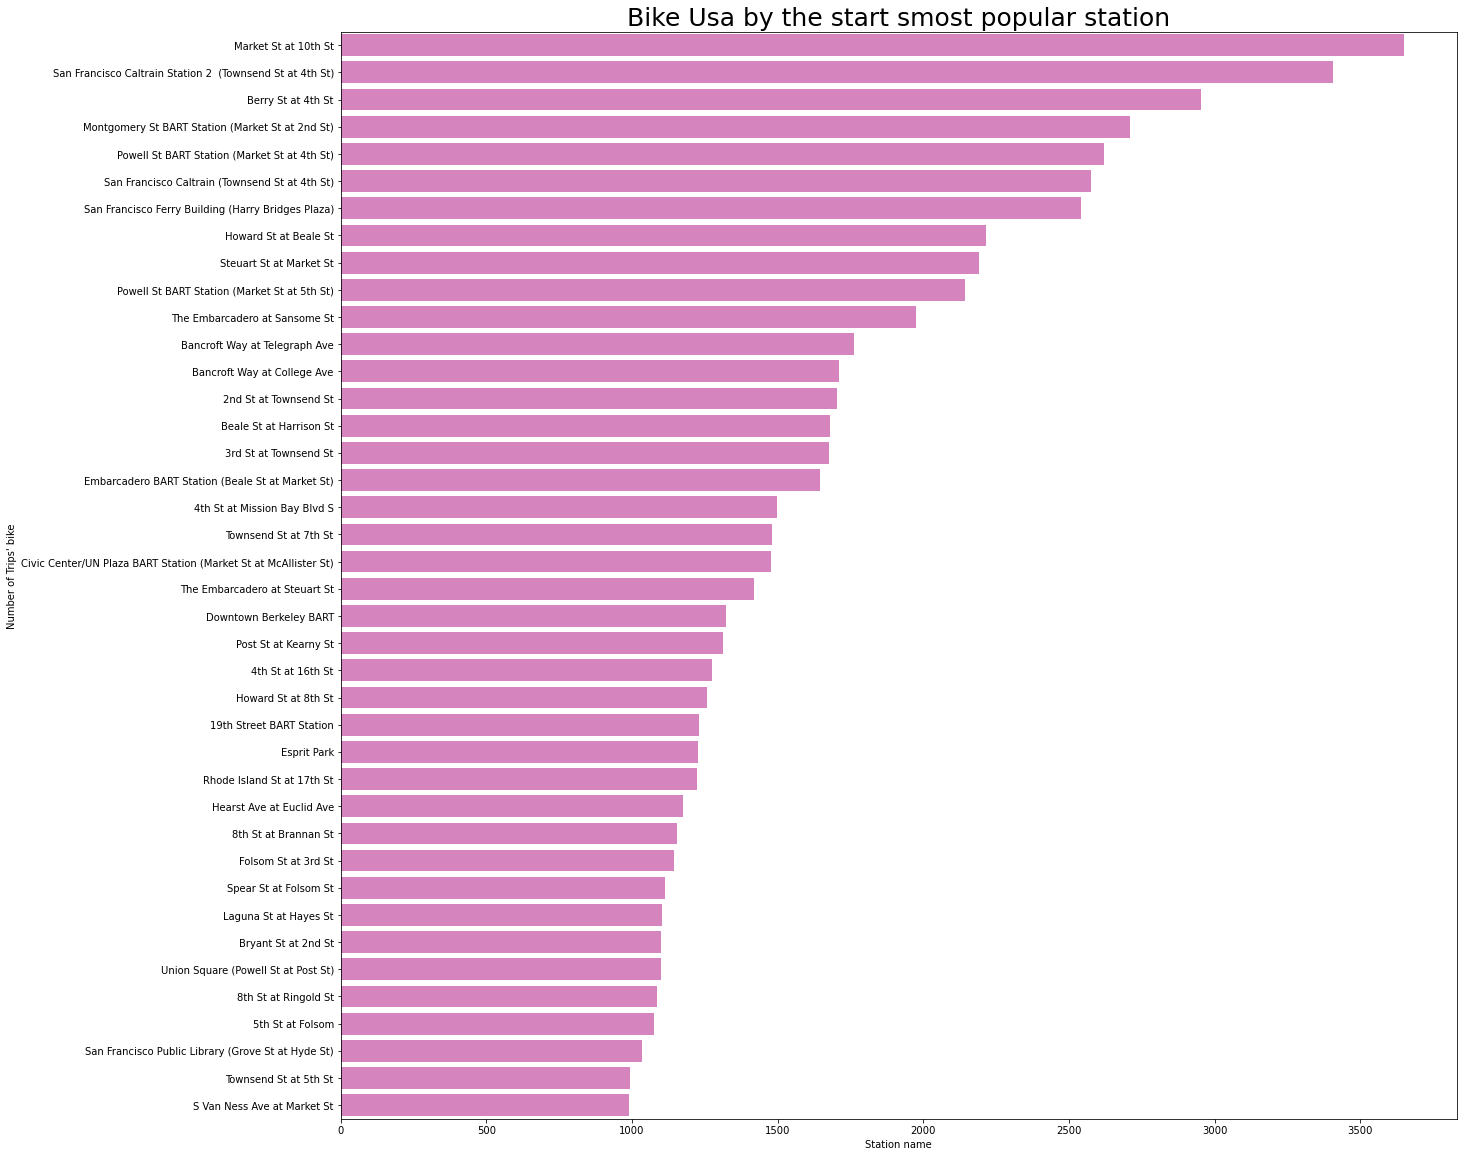

In [276]:
# what is the most popular start station?
fig_dims = (20, 20)

                 
fig, ax= plt.subplots(figsize=fig_dims)
color = sns.color_palette()[6]
#Because it is a lot of stations, we will focus on the 40 most popular 
order=bike.start_station_name.value_counts().head(40).index

sns.countplot(data=bike, y='start_station_name',color=color, order=order);

plt.xlabel("Station name")
plt.ylabel("Number of Trips' bike")

plt.title('Bike Usa by the start smost popular station', y=1, fontsize=25 );



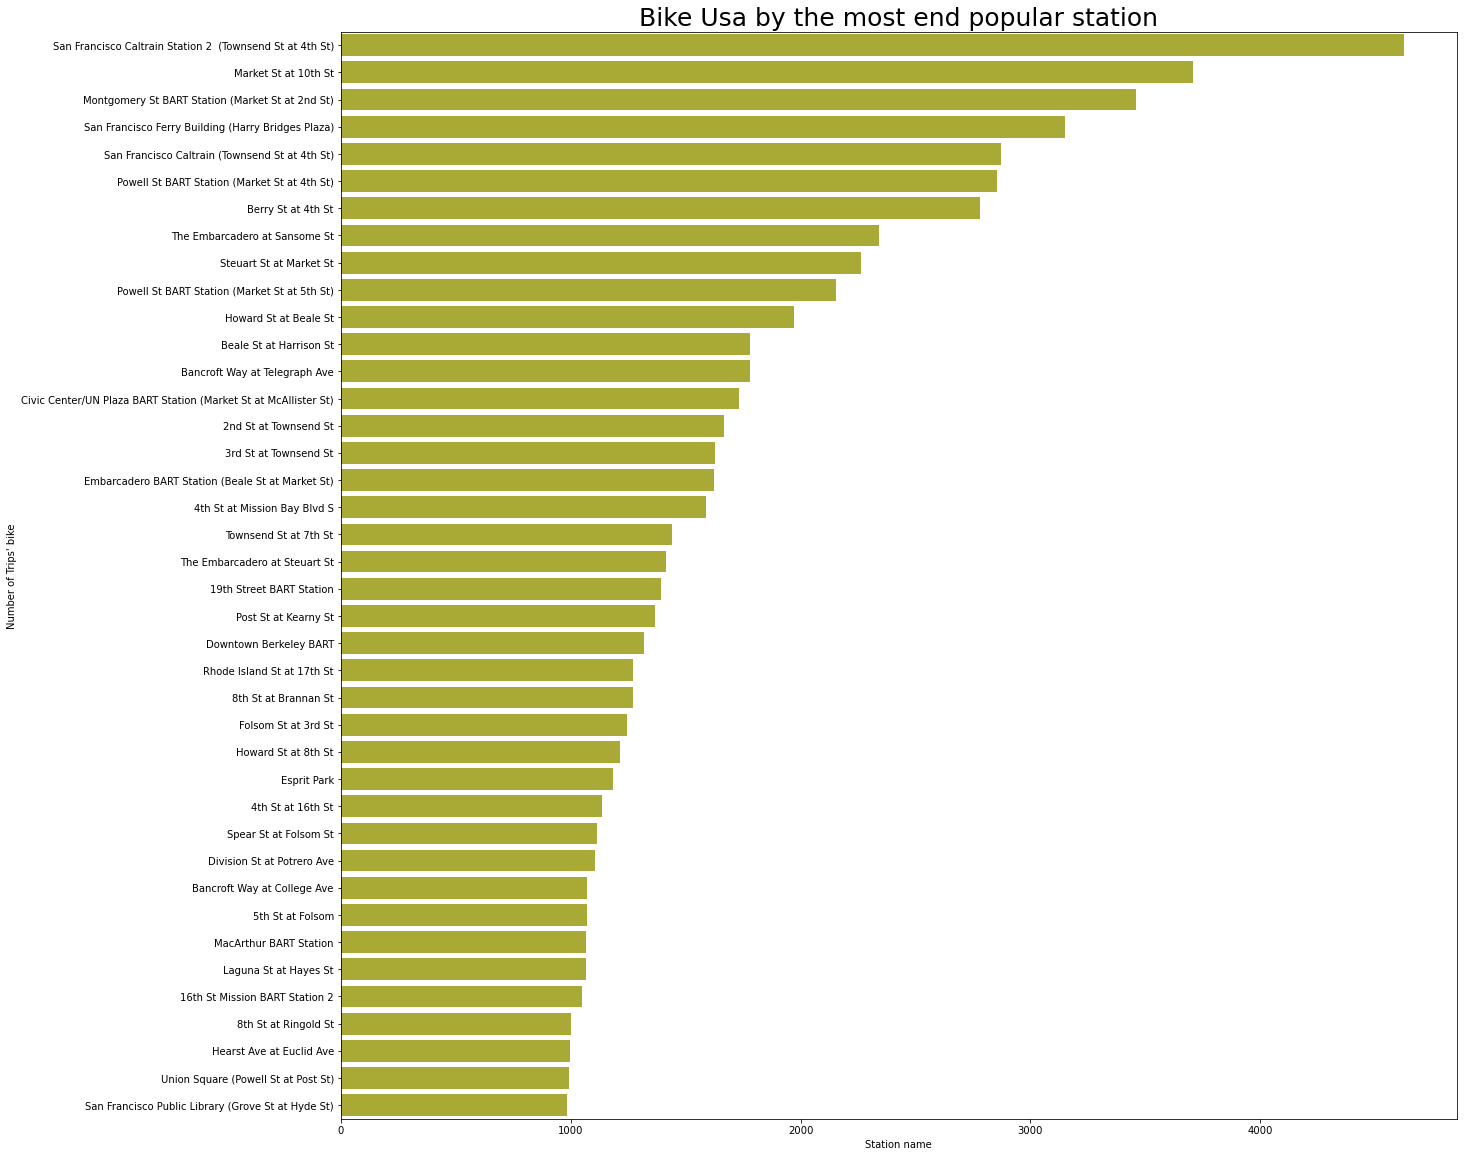

In [275]:
# what is the most popular start station?
fig_dims = (20, 20)

                 
fig, ax= plt.subplots(figsize=fig_dims)
color = sns.color_palette()[8]
#Because it is a lot of stations, we will focus on the 40 most popular 
order=bike.end_station_name.value_counts().head(40).index

sns.countplot(data=bike, y='end_station_name',color=color, order=order);

plt.xlabel("Station name")
plt.ylabel("Number of Trips' bike")

plt.title('Bike Usa by the most end popular station', y=1, fontsize=25 );



Understanding which stations are more common at the beginning of a trip and those at the end of a trip are significant for the business understanding of where additional bicycles are needed due to congestion and where bicycles can be taken (because there are fewer passengers) and transferred to busier places.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the plots were easy to plot because of the dropping nulls and wranglilng the data.
One  plot I needed to customize the distribution - the age plot. I saw there were a lot of outliers so I re-arranged the plot and find out that the average usage age is between 20-45. I was surprised to find out the most popular days are 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did a cleaning process: I changed some data type so it will be easy to calculate, I dropped a nulls values, I dropped some columns which weren't part of the investigations. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 1.0, 'Frequency by age and gender')

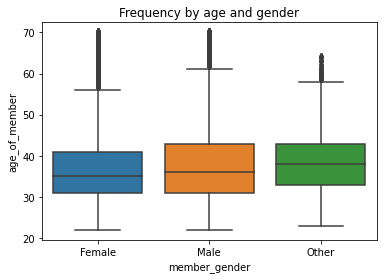

In [29]:
#Distribution by age and gender

sns.boxplot(data=bike, x="member_gender", y="age_of_member")
#sns.swarmplot(x='member_gender', y='age_of_member', data=bike, color='black', alpha=0.4)
plt.title('Frequency by age and gender')

The chart shows the average age by gender. It can be seen that the average age when using bicycles between men and women is somewhat similar - between 20 - 40. Men tend to use bicycles even at an older age than women. 

Text(0.5, 1.0, 'AVG.Duration trip by minuts per user')

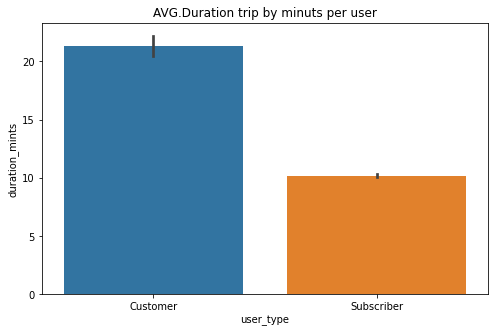

In [360]:
# what is the duration in minuts for user type?

plt.figure(figsize = [8, 5])

sns.barplot(x='user_type', y='duration_mints',data=bike)

plt.title('AVG.Duration trip by minuts per user')

Who uses the bike for longer periods of time - customers or subscribers? It seems like customers.

Text(0.5, 1.0, 'AVG.Duration trip by minuts per member gender')

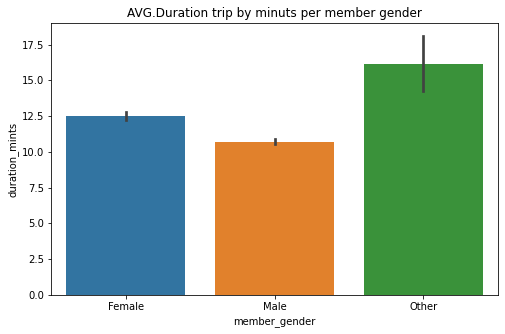

In [361]:
# what is the duration in minuts for member gender?

plt.figure(figsize = [8, 5])

sns.barplot(x='member_gender', y='duration_mints',data=bike)
plt.title('AVG.Duration trip by minuts per member gender')

Although in the diagram above it is found that men make more trips overall than women on the bike, when you come to investigate the average travel time - it seems that women, when they are already traveling on the bike - they travel in a little more time than men for a greater distance.

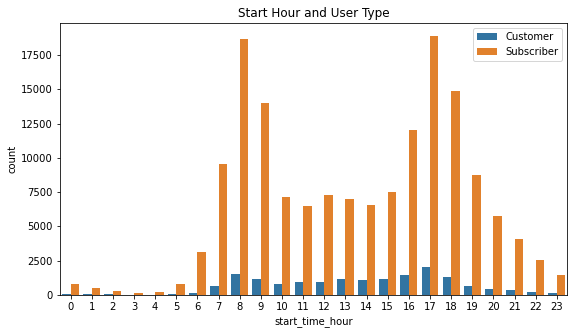

In [279]:
# Is there realationship between user type and duration of use?

plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sns.countplot(data = bike, x = 'start_time_hour', hue = 'user_type')
plt.legend();
plt.title('Start Hour and User Type');

During rush hour, subscribers travel more than casual customers by bicycle by a significant gap.

<AxesSubplot:xlabel='user_type', ylabel='count'>

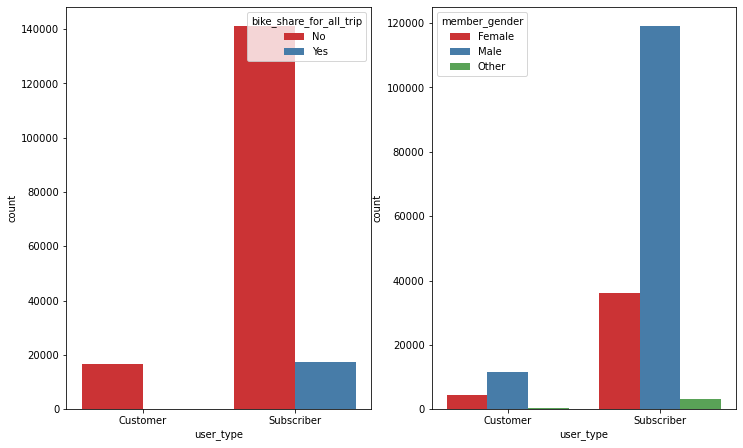

In [372]:


n_rows = 1
n_cols = 2
 
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(12,7.4))


#fg=sns.FacetGrid(bike, col='user_type', row='member_gender')
# plot 1 - cell (0,0)
sns.countplot(x='user_type', hue='bike_share_for_all_trip', data=bike,
              ax=axs[0,0],
              palette='Set1')
 
 

# plot 2 - cell (0,1)
sns.countplot(x='user_type', hue='member_gender', data=bike,
              ax=axs[0,1],
              palette='Set1')


presenting 2 plots: 
one, the division by gender component by user type
second, Who used the service of a complete pre-ride cycle more - 
a subscriber or a consumer?

In [51]:
mints_weekday_gender_groupby=bike.groupby(['member_gender','weekday_start_time']).size()
mints_weekday_gender_groupby

member_gender  weekday_start_time
Female         Friday                 6107
               Monday                 5773
               Saturday               3431
               Sunday                 3555
               Thursday               8001
               Tuesday                7228
               Wednesday              6544
Male           Friday                20778
               Monday                19145
               Saturday              10573
               Sunday                10495
               Thursday              24769
               Tuesday               22606
               Wednesday             21129
Other          Friday                  576
               Monday                  530
               Saturday                309
               Sunday                  304
               Thursday                722
               Tuesday                 559
               Wednesday               597
dtype: int64

In [52]:
mints_weekday_gender_groupby=mints_weekday_gender_groupby.reset_index(name='count')
mints_weekday_gender_groupby

,member_gender,weekday_start_time,count
0,Female,Friday,6107
1,Female,Monday,5773
2,Female,Saturday,3431
3,Female,Sunday,3555
4,Female,Thursday,8001
5,Female,Tuesday,7228
6,Female,Wednesday,6544
7,Male,Friday,20778
8,Male,Monday,19145
9,Male,Saturday,10573


Text(0.5, 1.0, 'Counts of trips by gender per weekday')

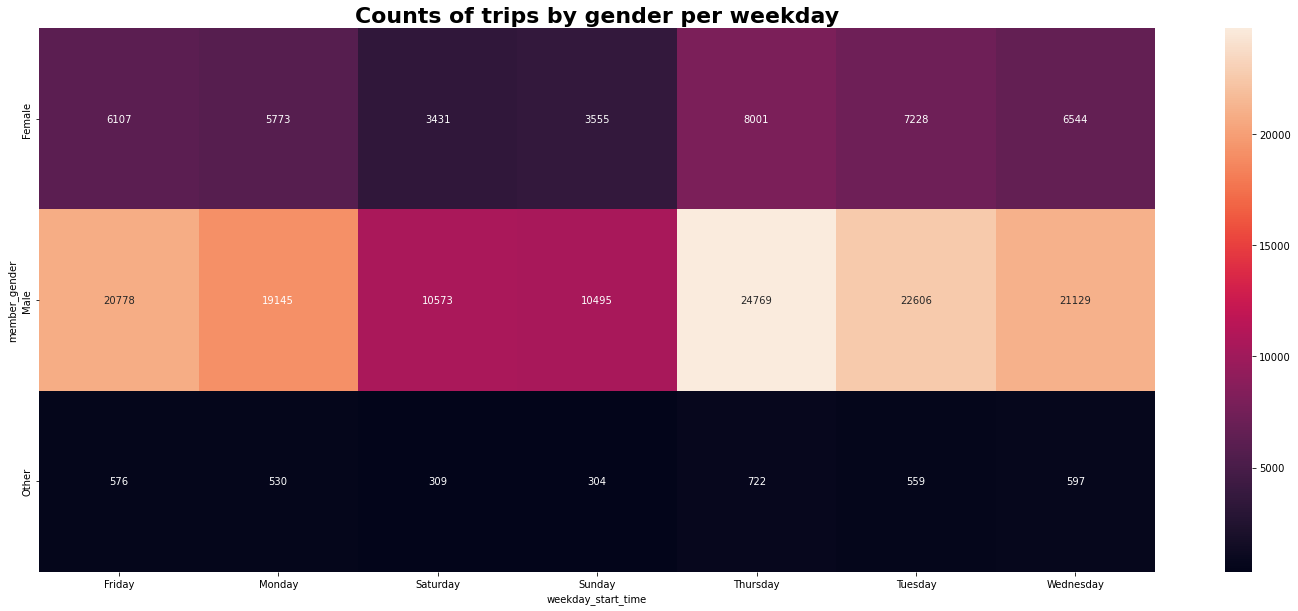

In [53]:
#Data about gender by weekday and counts of trips

plt.figure(figsize=[25, 10])

mints_weekday_gender_groupby=mints_weekday_gender_groupby.pivot(index='member_gender',columns='weekday_start_time', values='count')

sns.heatmap(mints_weekday_gender_groupby, annot = True, fmt='d')
plt.title('Counts of trips by gender per weekday', fontsize=22, fontweight='bold' )

In the heatmap plot, here you can see the combination of the gender and the number of turns each gender made according to the layout of the days of the week. It seems that the busier days are Tuesday and Thursday among the men.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers seem to travel much more significantly than customers. It is possible that to make it easier for them to use, they made a subscription because that way it is easier to rent the bikes. According to the hours of use (morning and afternoon) it seems that more subscribers use bicycles to get to and from work than for fun.
In addition, the map shows in a very visual and tangible way the distribution in the use of bicycle tours between women and men as well as over the days of the week. Adding the numbers on the map shows the quantities in an excellent way.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to find out that although in the diagram above it is found that men make more trips overall than women on the bike, when you come to investigate the average travel time - it seems that women, when they are already traveling on the bike - they travel in a little more time than men for a greater distance.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1.0, 'Trip duration by gender per weekday')

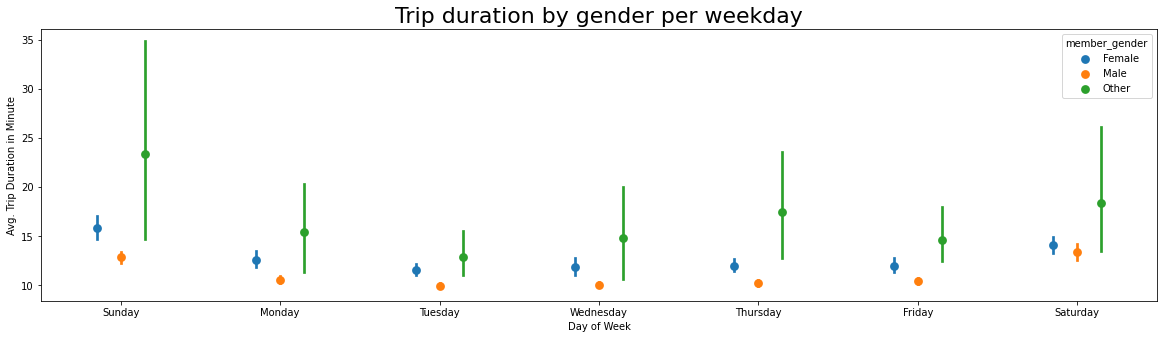

In [56]:
plt.figure(figsize = [20, 5])
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']



sns.pointplot(data=bike, x='weekday_start_time', y='duration_mints', hue='member_gender', dodge=0.3, linestyles="", order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Trip duration by gender per weekday', fontsize=22)

In a total calculation of the number of minutes per round over the week, and in the distribution of gender, it was found that the women use bicycles a little longer than the men, but the men use bicycles in general more than women, simply for shorter trips.

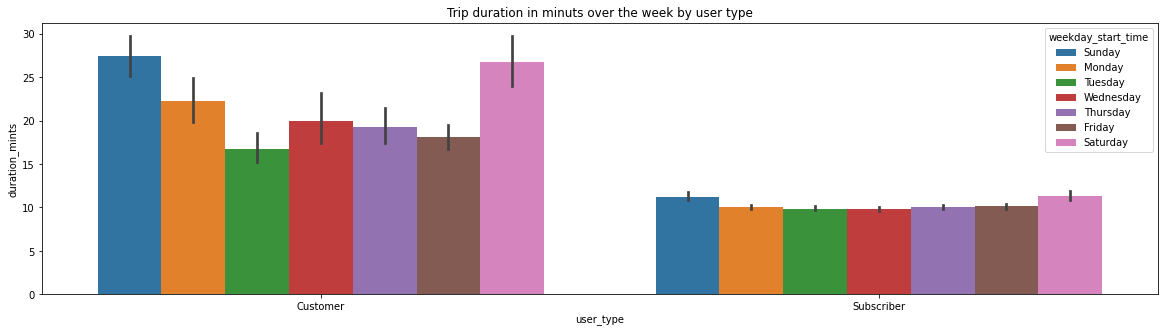

In [68]:
# What is the most popular day by user type?
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize = [20, 5])



sns.barplot(x='user_type', y='duration_mints', data=bike, hue='weekday_start_time', hue_order= weekday);
plt.title('Trip duration in minuts over the week by user type');



It seems that customers  are riding more time than subscriber. Both are used more on Tuesdays and Thursdays than on other days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>It can be seen that in the multivariate graph there is a division of user type and subscribers over the week in the division of the duration of the trip in minutes. You can see that the customers make a longer round than the subscribers. But we saw in the chart above that the subscribers are the ones who use more but for short periods of time. Both are used more on Tuesdays and Thursdays than on other days.

### Were there any interesting or surprising interactions between features?

> It was interesting to see the distribution over the week and to find that women use less than men but for longer periods of time.

## Conclusions
> The regular use is in the morning and most likely for getting to work.

> The busiest days are Tuesday and Thursday.

> More subscribers are users than casual customers.

> More men use than women.

> Women ride for longer than men.

> From a business point of view and increasing profits, I would suggest publishing ads that encourage more specifically women to ride bicycles, and I would also increase the pool of subscribers and bring all kinds of benefits so that it would pay off for people to choose to be subscribers and not just customers.

>For further research, I would suggest to examine after massive advertising, is there an increase in the number of women who use?
Is there an increase in the average age of the people who use bicycles?
Try to advertise in a certain way that will encourage people to use bicycles throughout the week including the weekend to tourist places and thus increase the income from bicycle rentals.
